# Solar Cycle Analysis

This plots data written by the `process_uncertainties.py` script.

In [2]:
import sys

from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append("../..")
from constants import MIN_DAYSAHEAD, MAX_DAYSAHEAD, BIN_FREQ_PER_DAY

sns.set()

In [8]:
!ls ../../data/processed/gaussian2/k35/

delta_window0	delta_window12	delta_window3  delta_window6  delta_window9
delta_window1	delta_window16	delta_window4  delta_window7
delta_window10	delta_window2	delta_window5  delta_window8


In [9]:
df = pd.read_csv(
    f"../../data/processed/gaussian2/k35/delta_window4/processed_daysahead3_R000.csv"
)
df["current_time"] = pd.to_datetime(df["current_time"])
df

,current_time,forward_time,forward_Vp_pred,forward_Vp_obs,forward_sigma,forward_crps
0,2010-01-04 18:00:00,2010-01-07 12:00:00,302.650000,286.61,96.238650,23.554548
1,2010-01-05 00:00:00,2010-01-07 18:00:00,306.100000,283.42,84.650720,22.192234
2,2010-01-05 06:00:00,2010-01-08 00:00:00,317.327273,309.38,98.268001,23.221008
3,2010-01-05 12:00:00,2010-01-08 06:00:00,328.554545,274.53,96.180768,34.274529
4,2010-01-05 18:00:00,2010-01-08 12:00:00,320.569697,280.69,91.876971,28.270464
...,...,...,...,...,...,...
16040,2020-12-27 18:00:00,2020-12-30 12:00:00,384.250000,476.30,118.054105,54.855210
16041,2020-12-28 00:00:00,2020-12-30 18:00:00,469.000000,454.90,105.620956,25.432901
16042,2020-12-28 06:00:00,2020-12-31 00:00:00,453.683333,433.50,100.592094,25.118062
16043,2020-12-28 12:00:00,2020-12-31 06:00:00,438.366667,382.20,102.171841,35.893853


In [10]:
sc_min = datetime(2010, 1, 1)
sc_max = datetime(2014, 6, 1)
sc_min2 = datetime(2020, 1, 1)

In [11]:
delta = timedelta(days=365)

min_start1 = sc_min
min_end1 = sc_min + delta - timedelta(days=1)
min_start2 = sc_min2 - delta
min_end2 = sc_min2 + delta

max_start = sc_max - delta
max_end = sc_max + delta

forward_idx = 0

strftime = "%Y"
min_label = "Around Solar Minimum\n(2010, 2019-2020)"

strftime = "%b%Y"
max_label = "Around Solar Maximum\n(%s - %s)" % (
    max_start.strftime(strftime),
    max_end.strftime(strftime),
)

(4354,)
(2921,)


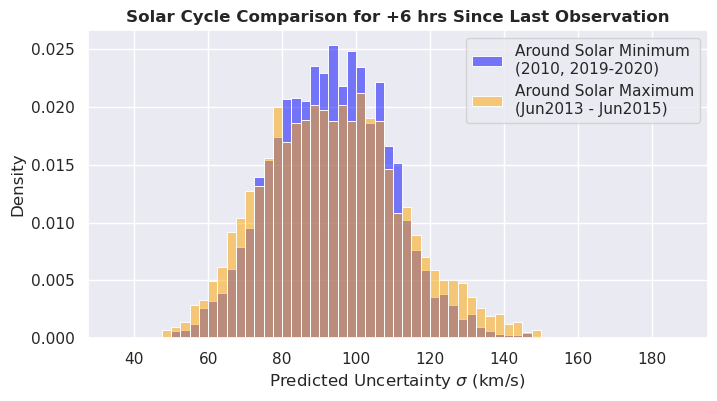

In [15]:
bins = np.arange(35, 190, 2.5)
sigmas_min = df[
    df["current_time"].between(min_start1, min_end1)
    | df["current_time"].between(min_start2, min_end2)
][f"forward_sigma"]
sigmas_max = df[df["current_time"].between(max_start, max_end)][f"forward_sigma"]

print(sigmas_min.shape)
print(sigmas_max.shape)

plt.figure(figsize=(8, 4))
sns.histplot(
    sigmas_min, color="blue", label=min_label, bins=bins, stat="density", alpha=0.5
)
sns.histplot(
    sigmas_max, color="orange", label=max_label, bins=bins, stat="density", alpha=0.5
)
plt.xlabel(r"Predicted Uncertainty $\sigma$ (km/s)")
plt.legend()
plt.title("Solar Cycle Comparison for +6 hrs Since Last Observation", fontweight="bold")
plt.savefig("../../plots/histogram_of_sigmas.png", dpi=300)